## <font color = #990775> INSURANCE CROSS SELL</font>

### <font color=#990775>IMPORTS</font>

In [1]:
import math
import numpy               as np
import pandas              as pd
import seaborn             as sns
import plotly.express      as px
import matplotlib
import datetime
import inflection

from numpy                 import int64
from matplotlib            import pyplot as plt
from IPython.display       import Image
from IPython.core.display  import HTML

import warnings
warnings.filterwarnings('ignore')

### <font color = #990775>Helper Functions</font>

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

In [3]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


### <font color = #990775>Loading Data</font>

In [4]:
data_raw = pd.read_csv('../data/train.csv')

In [5]:
df1 = data_raw.copy()

In [6]:
df1.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


## <font color = #990775>DATA DESCRIPTION</font>

### <font color = #990775>Rename Columns</font>

In [7]:
df1.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [8]:
cols_old = ['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response']

snakecase = lambda x: inflection.underscore(x)

cols_new = list(map(snakecase, cols_old))

# rename
df1.columns = cols_new

### <font color = #990775>Data Dimensions</font>

In [9]:
print('Number of Rows: {}'.format(df1.shape[0]))
print('Number of Columns: {}'.format(df1.shape[1]))

Number of Rows: 381109
Number of Columns: 12


### <font color = #990775>Data Types</font>

In [10]:
df1.dtypes

id                        int64
gender                   object
age                       int64
driving_license           int64
region_code             float64
previously_insured        int64
vehicle_age              object
vehicle_damage           object
annual_premium          float64
policy_sales_channel    float64
vintage                   int64
response                  int64
dtype: object

### <font color = #990775>Change Data Types</font>

In [11]:
df1['id'] = df1['id'].astype(str)
df1['driving_license'] = df1['driving_license'].astype(str)
df1['previously_insured'] = df1['previously_insured'].astype(str)
df1['region_code'] = df1['region_code'].astype(str)
df1['policy_sales_channel'] = df1['policy_sales_channel'].astype(str)
df1['response'] = df1['response'].astype(str)

In [12]:
df1.dtypes

id                       object
gender                   object
age                       int64
driving_license          object
region_code              object
previously_insured       object
vehicle_age              object
vehicle_damage           object
annual_premium          float64
policy_sales_channel     object
vintage                   int64
response                 object
dtype: object

### <font color = #990775>Check NA</font>

In [13]:
df1.isna().sum()

id                      0
gender                  0
age                     0
driving_license         0
region_code             0
previously_insured      0
vehicle_age             0
vehicle_damage          0
annual_premium          0
policy_sales_channel    0
vintage                 0
response                0
dtype: int64

### <font color = #990775>Descriptive Statistical</font>

In [14]:
num_attributes = df1.select_dtypes(include=['int64', 'float64'])
cat_attributes = df1.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])

#### <font color = #990775>Numerical Attributes</font>

In [15]:
# Central Tendency: mean, median
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

# Dispersion: std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

# concatenate
m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis' ]

In [16]:
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,age,20.0,85.0,65.0,38.822584,36.0,15.511591,0.672539,-0.565655
1,annual_premium,2630.0,540165.0,537535.0,30564.389581,31669.0,17213.132474,1.766087,34.004569
2,vintage,10.0,299.0,289.0,154.347397,154.0,83.671194,0.003030,-1.200688


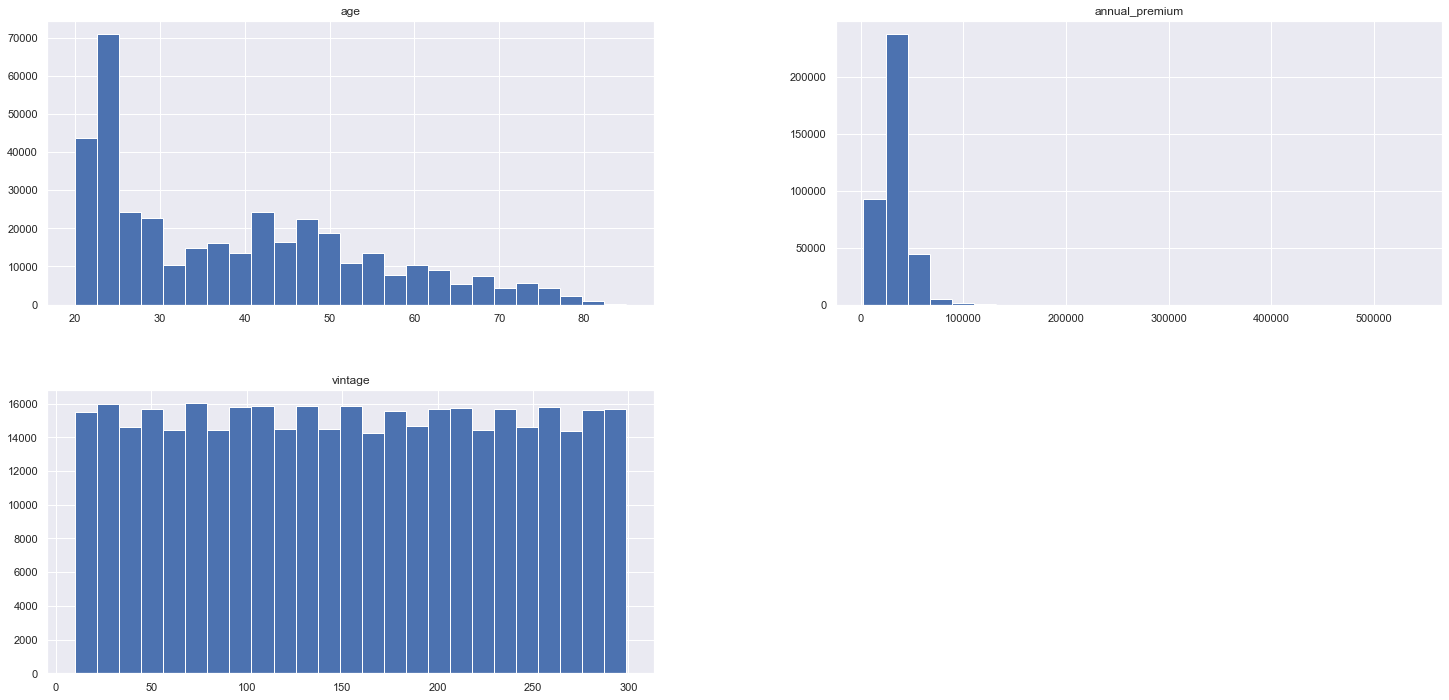

In [44]:
matplotlib.rcParams.update({'font.size': 5})
num_attributes.hist(bins = 25);

#### <font color = #990775>Categorical Attributes</font>

In [17]:
cat_attributes.apply(lambda x: x.unique().shape[0])

id                      381109
gender                       2
driving_license              2
region_code                 53
previously_insured           2
vehicle_age                  3
vehicle_damage               2
policy_sales_channel       155
response                     2
dtype: int64

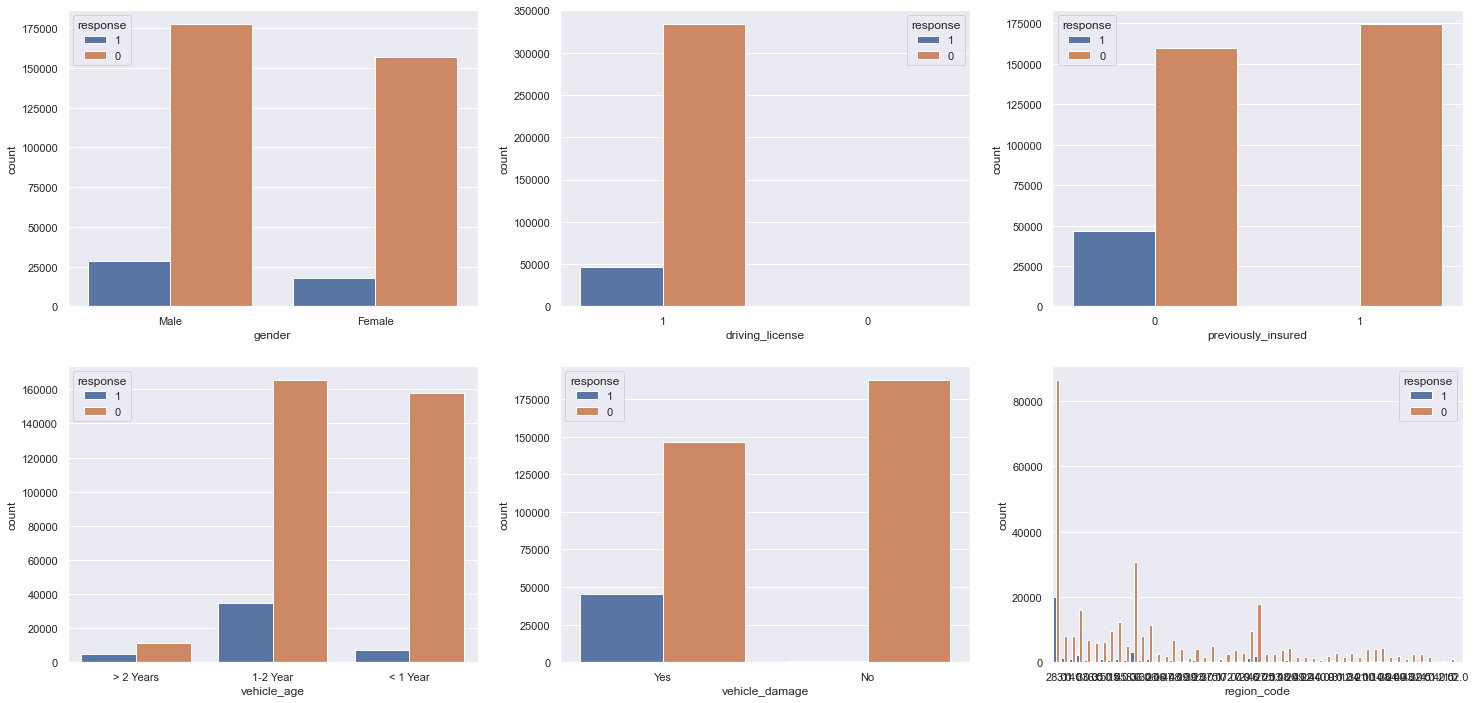

In [18]:
grid = GridSpec(2, 3)

# plt.subplot(1, 3, 1)
plt.subplot(grid[0, 0])
sns.countplot(data=df1, x='gender', hue='response');

plt.subplot(grid[0, 1])
sns.countplot(data=df1, x='driving_license', hue='response');

plt.subplot(grid[0, 2])
sns.countplot(data=df1, x='previously_insured', hue='response');

plt.subplot(grid[1, 0])
sns.countplot(data=df1, x='vehicle_age', hue='response');

plt.subplot(grid[1, 1])
sns.countplot(data=df1, x='vehicle_damage', hue='response');

plt.subplot(grid[1, 2])
sns.countplot(data=df1, x='region_code', hue='response');

In [19]:
df1.driving_license.value_counts()

1    380297
0       812
Name: driving_license, dtype: int64

## <font color = #990775>FEATURE ENGINEERING</font>

In [20]:
df2 = df1.copy()

### <font color = #990775>Mind Map Hypothesis</font>

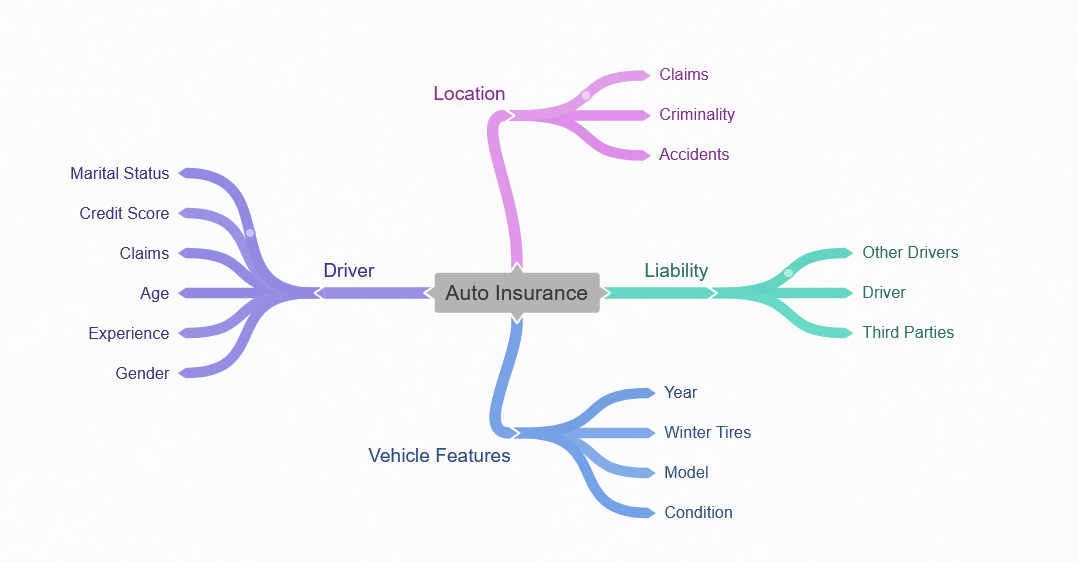

In [21]:
Image("../images/mind_map.png")

### <font color = #990775>Hypothesis Creation</font>

**-** Unlicensed clients would be less likely to purchase auto insurance

**-** Clients from locations with a high level of claims would be more likely to purchase auto insurance

**-** Younger clients would be more likely to purchase auto insurance

**-** Female clients would be more likely to purchase auto insurance

**-** Clients who have already had their vehicle damaged would be more likely to purchase auto insurance

**-** Clients who have already been involved in any vehicle accident would be more likely to purchase auto insurance

**-** Clients who have already had their vehicle insured would be more likely to purchase auto insurance

**-** Clients for a longer time at the current brokerage would be more likely to purchase auto insurance

**-** Clients who pay more for health insurance would be more likely to purchase auto insurance

**-** Clients under some specific policy sales channels would be more likely to purchase auto insurance

**-** Clients with more than 2 drivers in the household would be more likely to purchase auto insurance

**-** Clients with older vehicles would be less likely to purchase auto insurance.

#### <font color = #990775>List of discarded hypothesis for not having enough data to be tested</font>

**-** Clients who have already been involved in any vehicle accident would be more likely to purchase auto insurance

**-** Clients with more than 2 drivers in the household would be more likely to purchase auto insurance

**-** Clients from locations with a high level of claims would be more likely to purchase auto insurance

#### <font color = #990775>List of hypothesis to be tested (validate or disproof)</font>

**1.** Unlicensed clients would be less likely to purchase auto insurance

**2.** Younger clients would be more likely to purchase auto insurance

**3.** Female clients would be more likely to purchase auto insurance

**4.** Clients who have already had their vehicle damaged would be more likely to purchase auto insurance

**5.** Clients who have already had their vehicle insured would be more likely to purchase auto insurance

**6.** Clients for a longer time at the current brokerage would be more likely to purchase auto insurance

**7.** Clients who pay more for health insurance would be more likely to purchase auto insurance

**8.** Clients under some specific policy sales channels would be more likely to purchase auto insurance

**9.** Clients with older vehicles would be less likely to purchase auto insurance.

### <font color = #990775>Feature Engineering</font>

In [22]:
df2 = df1.copy()

In [23]:
# vehicle age
df2['vehicle_age'] = df2['vehicle_age'].apply(lambda x: 'over_2_years' if x=='> 2 Years' else 'between_1_2_years' if '1-2 Year' else 'below_1_year')

# vehicle damage
df2['vehicle_damage'] = df2['vehicle_damage'].apply(lambda x: 1 if x=='Yes' else 0)

In [24]:
df2.sample(5)

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
133834,133835,Female,68,1,28.0,0,between_1_2_years,1,23433.0,124.0,138,0
3614,3615,Male,39,1,28.0,1,between_1_2_years,0,49274.0,124.0,235,0
156204,156205,Female,72,1,23.0,0,over_2_years,1,47090.0,26.0,189,0
144594,144595,Male,52,1,41.0,0,between_1_2_years,1,33216.0,156.0,175,0
285070,285071,Male,20,1,32.0,1,between_1_2_years,1,2630.0,160.0,79,0


## <font color = #990775>FILTERING FEATURES</font>

Per the descriptive statistics analysis and the business assumptions, no features were considered to be filtered out (no data to be excluded).

## <font color = #990775>EXPLORATORY DATA ANALYSIS (EDA)</font>

In [25]:
df3 = df2.copy()

### <font color = #990775>Univariate Analysis</font>

#### <font color = #990775>Response Variable</font>

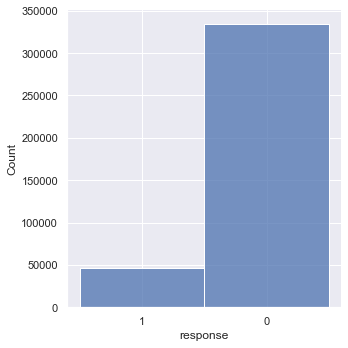

In [26]:
sns.displot(df3['response'])

#### <font color = #990775>Numerical Variables</font>

<AxesSubplot:xlabel='response', ylabel='age'>

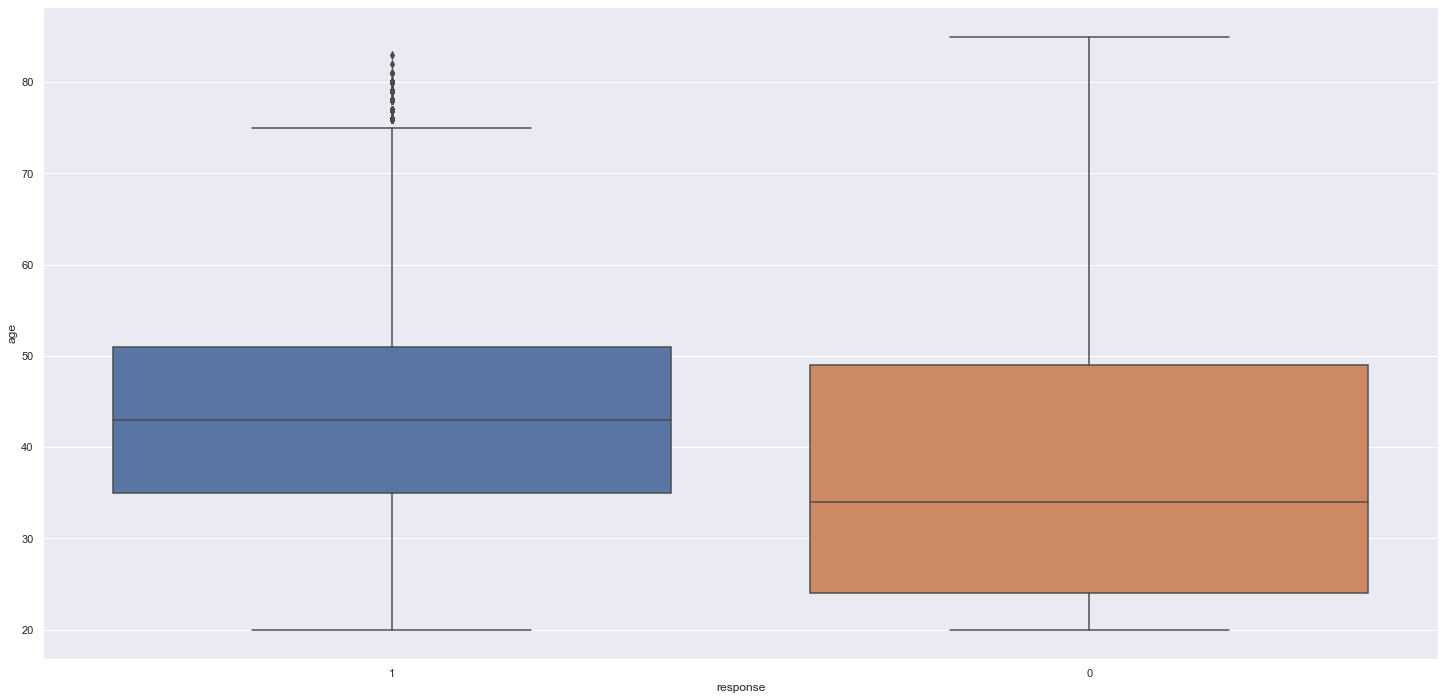

In [27]:
# age
sns.set(rc={'figure.figsize':(25, 12)})
sns.boxplot(x='response', y='age', data=df3)

Comparing the median in both boxplots we would consider 'age' as an important feature for the modelling,
since the customers that replied 'yes' are around 45 years old while the median for 'no' is around 35. 
Now, considering that age is a continuous variable, lets analyse it in another format (histogram):

<AxesSubplot:xlabel='age', ylabel='Count'>

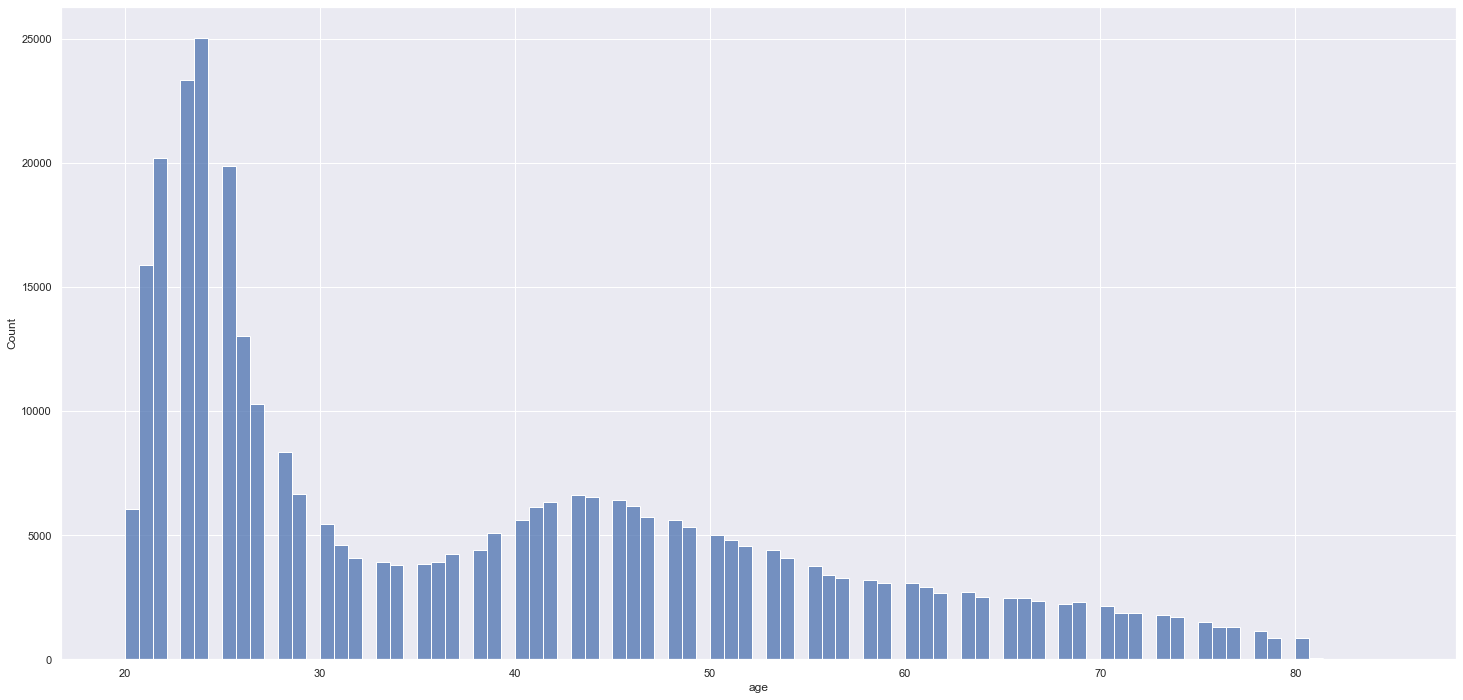

In [28]:
df3['response'] = df3['response'].astype(int64)
aux00 = df3.loc[df3['response'] == 0, 'age']
sns.histplot(aux00)

<AxesSubplot:xlabel='age', ylabel='Count'>

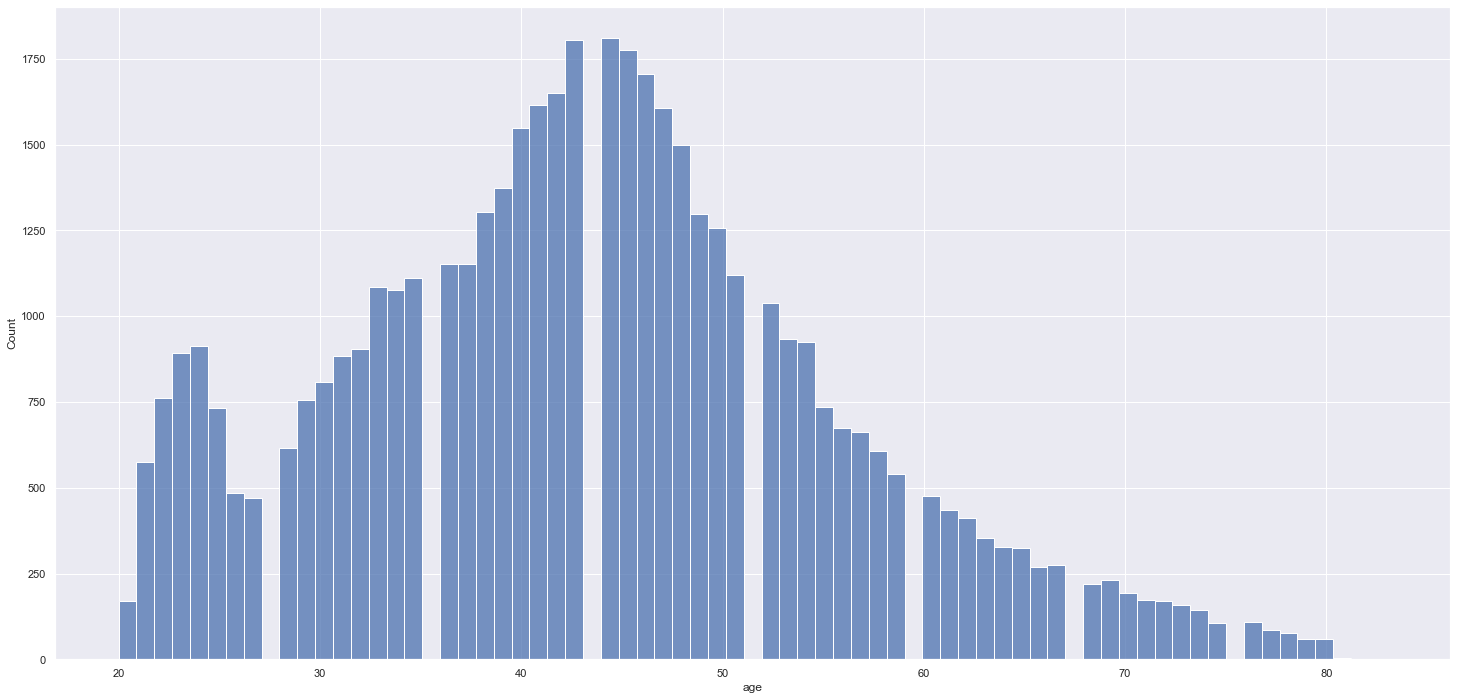

In [29]:
aux00 = df3.loc[df3['response'] == 1, 'age']
sns.histplot(aux00)

<AxesSubplot:xlabel='response', ylabel='annual_premium'>

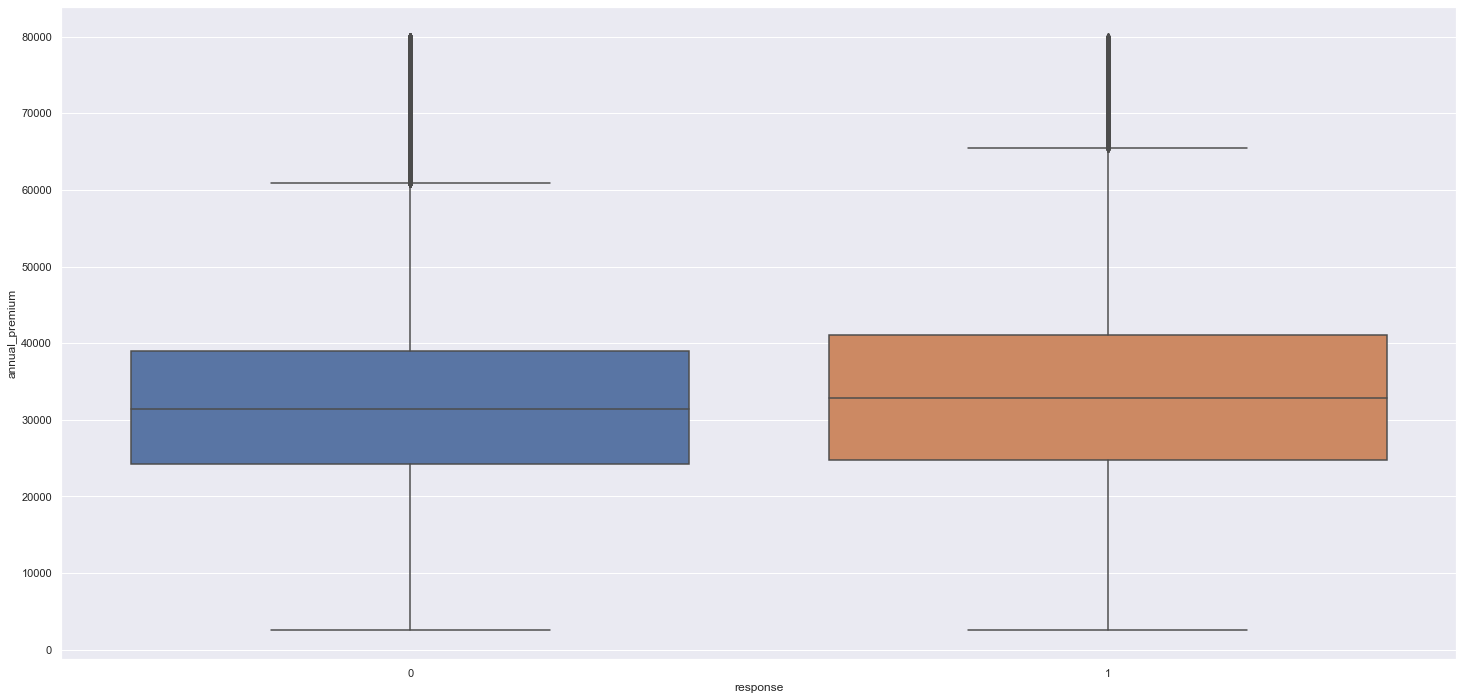

In [30]:
# annual_premium
aux = df3[df3['annual_premium'] < 80000]
sns.boxplot(x='response', y='annual_premium', data=aux)

<AxesSubplot:xlabel='annual_premium', ylabel='Count'>

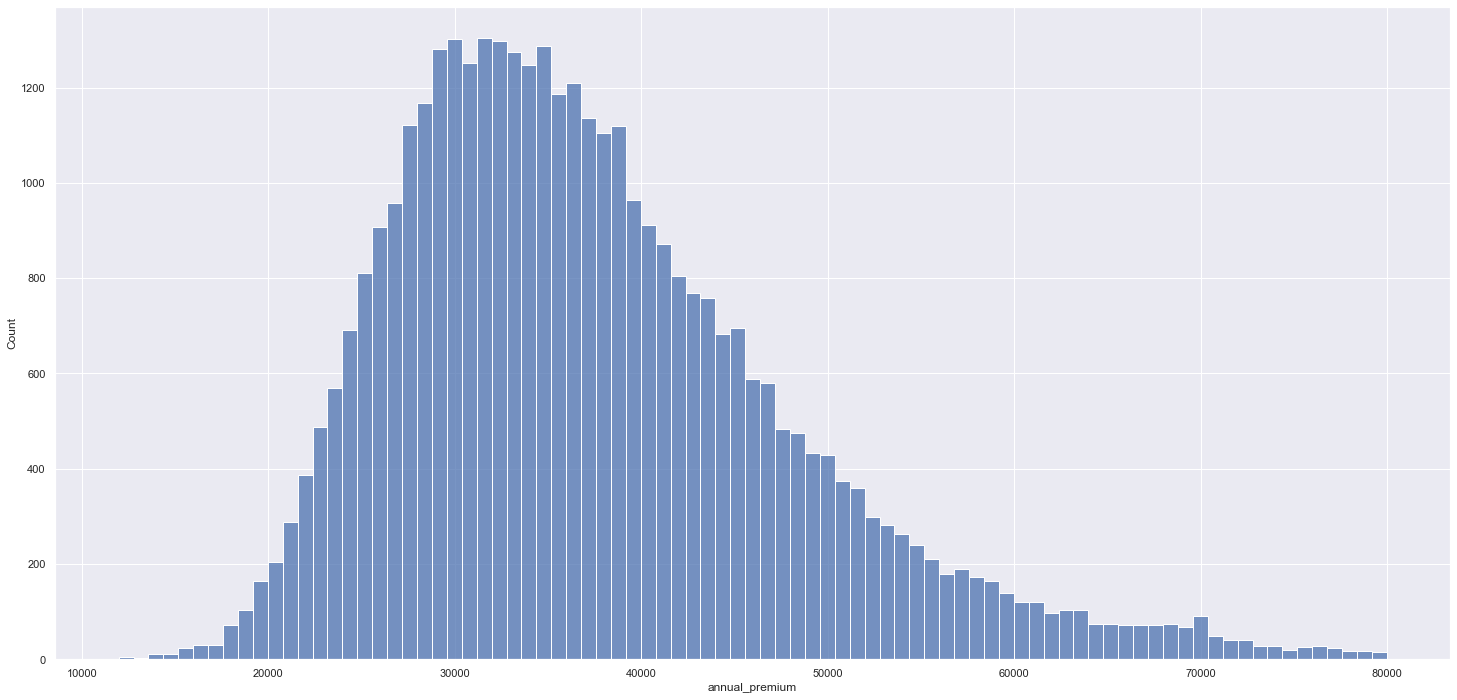

In [31]:
aux = df3[(df3['annual_premium'] > 10000) & (df3['annual_premium'] < 80000)]
aux00 = aux.loc[aux['response'] == 1, 'annual_premium']
sns.histplot(aux00)

<AxesSubplot:xlabel='annual_premium', ylabel='Count'>

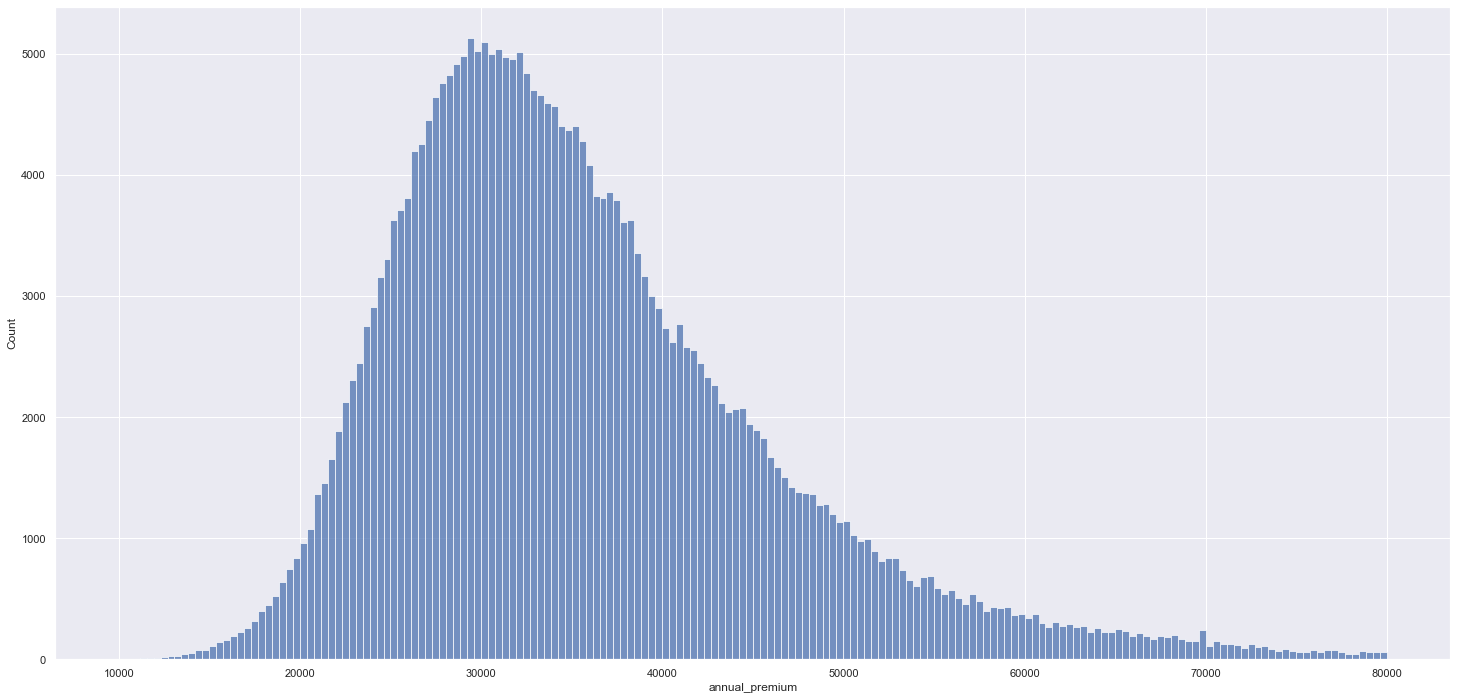

In [32]:
aux = df3[(df3['annual_premium'] > 10000) & (df3['annual_premium'] < 80000)]
aux00 = aux.loc[aux['response'] == 0, 'annual_premium']
sns.histplot(aux00)

In [33]:
# vintage

#### <font color = #990775>Categorical Variables</font>

In [34]:
# changing types to numerical to visualize in some other charts
# df3['gender'] = df3['gender'].astype(int64)
df3['driving_license'] = df3['driving_license'].astype(int64)
# df3['previously_insured'] = df3['previously_insured'].astype(int64)
# df3['vehicle_damaged'] = df3['vehicle_damaged'].astype(int64)
# df3['policy_sales_channel'] = df3['policy_sales_channel'].astype(int64)

In [35]:
# driving_license
aux = df3[['driving_license', 'response']].groupby('response').sum().reset_index()
aux['driving_license_perc'] = round(aux['driving_license'] / aux['driving_license'].sum(), 2)
aux.head()
# it shows clients that have driving license (some of 1's) for each response
# 88% of licensed clientes doesn't want to get a (new) automobile policy

,response,driving_license,driving_license_perc
0,0,333628,0.88
1,1,46669,0.12


<AxesSubplot:xlabel='response', ylabel='driving_license'>

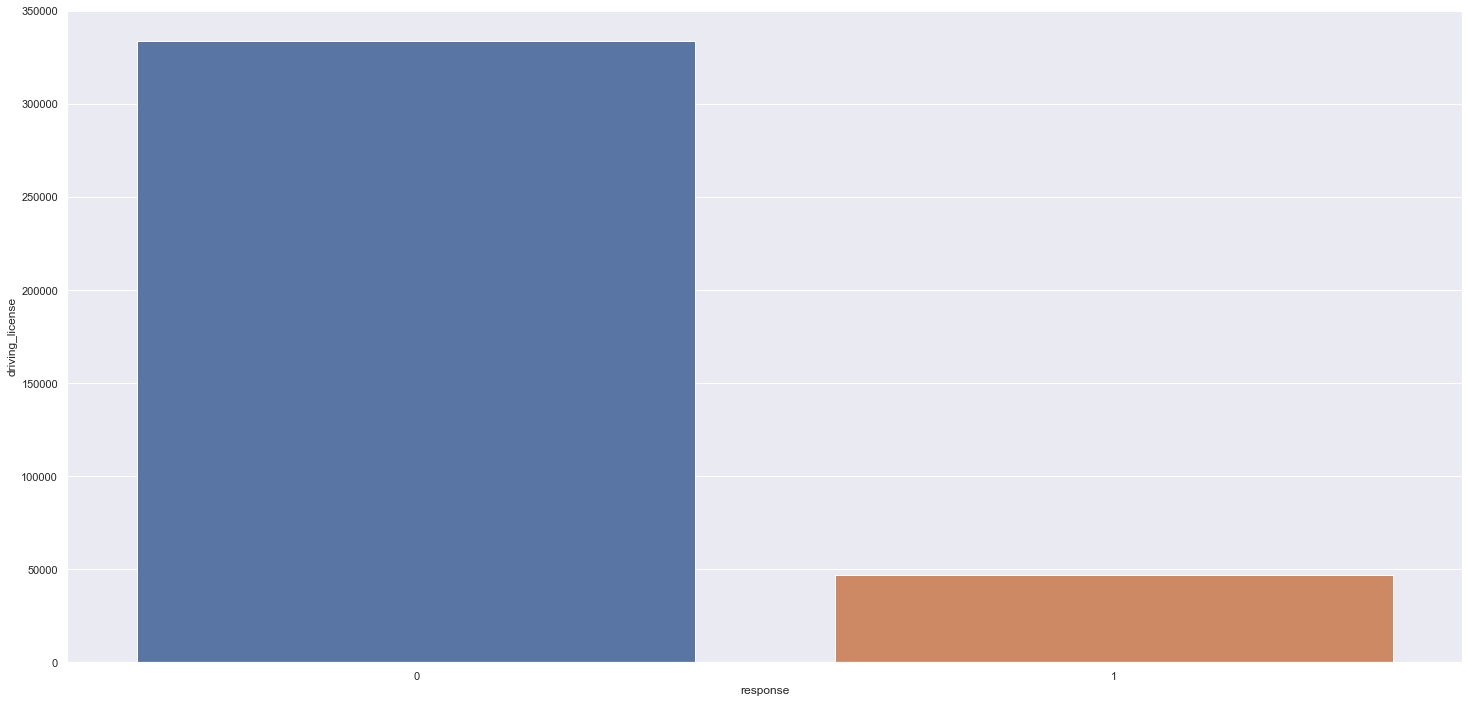

In [36]:
sns.barplot(x='response', y='driving_license', data=aux)

In [37]:
my_crosstab = pd.crosstab(index=df3['response'], columns=df3['driving_license'], margins=True)
my_crosstab

driving_license,0,1,All
response,,,
0,771,333628,334399
1,41,46669,46710
All,812,380297,381109


<AxesSubplot:xlabel='region_code', ylabel='id'>

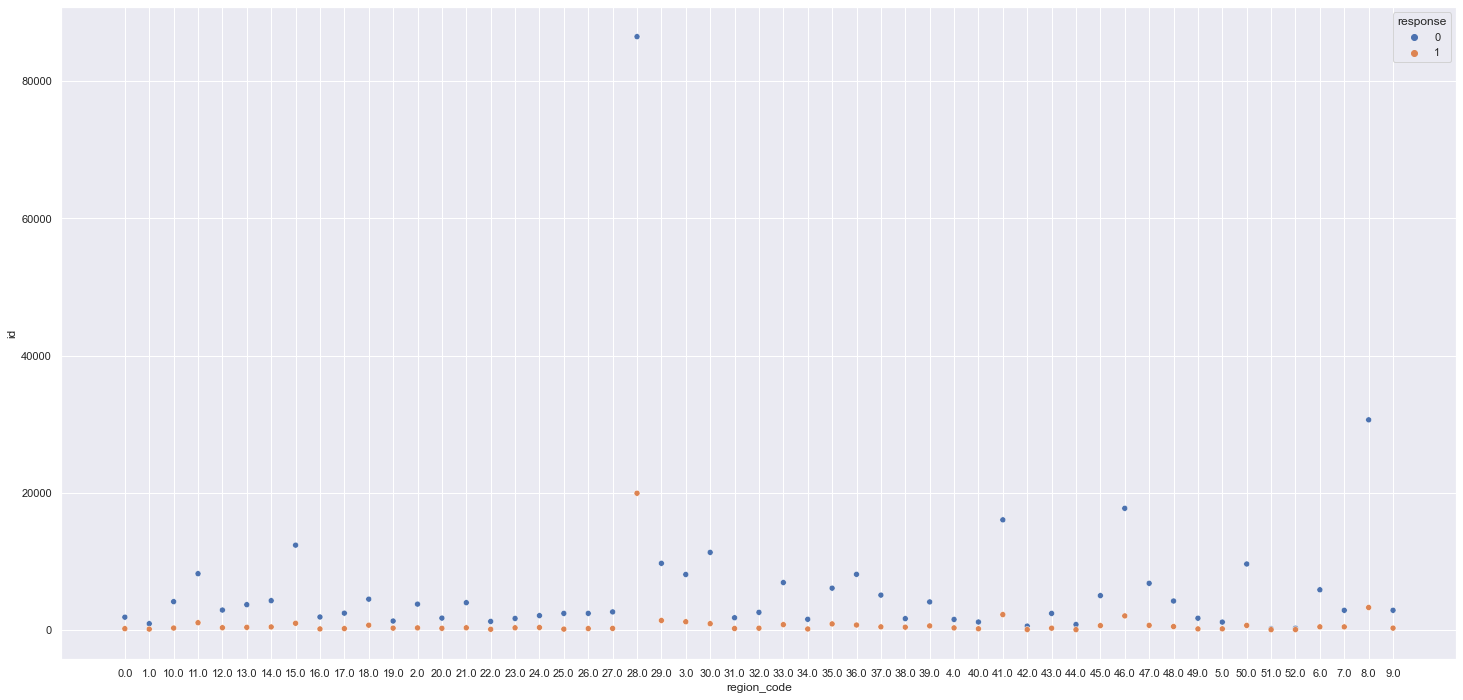

In [45]:
# region_code
aux0 = df3[['id','region_code', 'response']].groupby(['region_code', 'response']).count().reset_index()
sns.scatterplot(x='region_code', y='id', hue='response', data=aux0)

In [39]:
# previously_insured
pd.crosstab(df3['previously_insured'], df3['response']).apply(lambda x: x/x.sum(), axis=1)

response,0,1
previously_insured,,
0,0.774546,0.225454
1,0.999095,0.000905


In [40]:
# vehicle_age


In [41]:
# gender


In [42]:
df1['response'] = df1['response'].astype(str)

In [43]:
# vehicle_damage

 Parei aqui! ############################